<a href="https://colab.research.google.com/github/JingzhiZhou/Kiana-Project/blob/main/wang_predict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/3 x Zones Group Assignment/csv_remove device data/tps1_2_block89.csv")
df

,Building,Level,MAC,LAT,LNG,Time,Date,block
0,TPS1,Level 2,48:49:c7:12:a4:00,-22.811847,-43.250148,00:00:30.477,2019-08-12,block3
1,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811774,-43.250828,00:00:31.272,2019-08-12,block3
2,TPS1,Level 2,60:1d:91:04:cf:56,-22.811858,-43.249975,00:00:32.489,2019-08-12,block3
3,TPS1,Level 2,48:49:c7:12:a4:00,-22.811849,-43.250092,00:00:40.493,2019-08-12,block3
4,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811753,-43.250714,00:00:41.285,2019-08-12,block3
...,...,...,...,...,...,...,...,...
1362866,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812054,-43.250710,23:59:56.141,2019-09-08,block3
1362867,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.333,2019-09-08,block3
1362868,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.334,2019-09-08,block3
1362869,TPS1,Level 2,38:9a:f6:55:65:93,-22.812055,-43.250710,23:59:56.339,2019-09-08,block3


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/3 x Zones Group Assignment/csv_remove device data/tps1_2_9test_block1.csv')
df1

,Building,Level,MAC,LAT,LNG,Time,Date,block
0,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3
1,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3
2,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3
3,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3
4,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812084,-43.250550,00:00:06.312,2019-09-09,block3
...,...,...,...,...,...,...,...,...
625044,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811975,-43.250116,23:59:01.119,2019-09-29,block3
625045,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811975,-43.250116,23:59:11.151,2019-09-29,block3
625046,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811965,-43.250123,23:59:21.111,2019-09-29,block3
625047,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811953,-43.250129,23:59:31.143,2019-09-29,block3


In [ ]:
df['hour'] = df.Time.astype(str).str[:2]
df['hour']=df['hour'].replace(['00','01','02','03','04','05','06','23'],'low')
df['hour']=df['hour'].replace(['07','08','09','10','15','16','17','21','22'],'high')
df['hour']=df['hour'].replace(['11','12','13','14','18','19','20'],'medium')
df['weekday'] =  df.Date.astype(str).str[-2:]
df['weekday'] = df['weekday'].replace(['12','19','26','02'],'Monday')
df['weekday'] = df['weekday'].replace(['13','20','27','03'],'Tuesday')
df['weekday'] = df['weekday'].replace(['14','21','28','04'],'Wednsday')
df['weekday'] = df['weekday'].replace(['15','22','29','05'],'Thursday')
df['weekday'] = df['weekday'].replace(['16','23','30','06'],'Friday')
df['weekday'] = df['weekday'].replace(['17','24','31','07'],'Saturday')
df['weekday'] = df['weekday'].replace(['18','25','01','08'],'Sunday')
df

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,48:49:c7:12:a4:00,-22.811847,-43.250148,00:00:30.477,2019-08-12,block3,low,Monday
1,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811774,-43.250828,00:00:31.272,2019-08-12,block3,low,Monday
2,TPS1,Level 2,60:1d:91:04:cf:56,-22.811858,-43.249975,00:00:32.489,2019-08-12,block3,low,Monday
3,TPS1,Level 2,48:49:c7:12:a4:00,-22.811849,-43.250092,00:00:40.493,2019-08-12,block3,low,Monday
4,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811753,-43.250714,00:00:41.285,2019-08-12,block3,low,Monday
...,...,...,...,...,...,...,...,...,...,...
1362866,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812054,-43.250710,23:59:56.141,2019-09-08,block3,low,Sunday
1362867,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.333,2019-09-08,block3,low,Sunday
1362868,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.334,2019-09-08,block3,low,Sunday
1362869,TPS1,Level 2,38:9a:f6:55:65:93,-22.812055,-43.250710,23:59:56.339,2019-09-08,block3,low,Sunday


In [ ]:
df.hour.unique()

array(['low', 'high', 'medium'], dtype=object)

In [ ]:
df.weekday.unique()

array(['Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
count = df.groupby(['weekday','hour'])['MAC'].nunique()
count = pd.DataFrame({'counts':count/4})
count.reset_index(inplace=True)
count

,weekday,hour,counts
0,Friday,high,2587.75
1,Friday,low,900.50
2,Friday,medium,1887.25
3,Monday,high,1749.00
4,Monday,low,595.50
5,Monday,medium,1265.00
6,Saturday,high,2427.50
7,Saturday,low,937.25
8,Saturday,medium,1934.50
9,Sunday,high,3870.00


In [ ]:
m = smf.ols(formula = 'counts ~ weekday+hour',data = count).fit() 
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     17.68
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.56e-05
Time:                        19:02:40   Log-Likelihood:                -144.02
No. Observations:                  21   AIC:                             306.0
Df Residuals:                      12   BIC:                             315.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2463.1429    199.421     12.351      0.000    2028.641    2897.645
weekday[T.Monday]    -588.6667    248.722     -2.367      0.036   -1130.586     -46.748
weekday[T.Saturday]   -25.4167    248.722     -0.102      0.920    -567.336     516.502
weekday[T.Sunday]     892.8333    248.722      3.590      0.004     350.914    1434.752
weekday[T.Thursday]  -428.9167    248.722     -1.724      0.110    -970.836     113.002
weekday[T.Tuesday]   -283.1667    248.722     -1.138      0.277    -825.086     258.752
weekday[T.Wednsday]  -384.6667    248.722     -1.547      0.148    -926.586     157.252
hour[T.low]         -1542.1429    162.827     -9.471      0.000   -1896.912   -1187.374
hour[T.medium]       -471.7857    162.827     -2.897      0.013    -826.555    -117.016
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   3.220
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.844
Skew:                          -0.658   Prob(JB):                       0.0538
Kurtosis:                       5.224   Cond. No.                         8.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
test = count[['weekday', 'hour']]
test

,weekday,hour
0,Friday,high
1,Friday,low
2,Friday,medium
3,Monday,high
4,Monday,low
5,Monday,medium
6,Saturday,high
7,Saturday,low
8,Saturday,medium
9,Sunday,high


In [ ]:
pred = m.predict(test)

In [ ]:
count["pred"] = pred

In [ ]:
count['diff'] = count['counts'] - count['pred']
count['upper'] = count['pred'] + 500
count['lower'] =50
count

,weekday,hour,counts,pred,diff,upper,lower
0,Friday,high,2587.75,2463.142857,124.607143,2963.142857,50
1,Friday,low,900.50,921.000000,-20.500000,1421.000000,50
2,Friday,medium,1887.25,1991.357143,-104.107143,2491.357143,50
3,Monday,high,1749.00,1874.476190,-125.476190,2374.476190,50
4,Monday,low,595.50,332.333333,263.166667,832.333333,50
5,Monday,medium,1265.00,1402.690476,-137.690476,1902.690476,50
6,Saturday,high,2427.50,2437.726190,-10.226190,2937.726190,50
7,Saturday,low,937.25,895.583333,41.666667,1395.583333,50
8,Saturday,medium,1934.50,1965.940476,-31.440476,2465.940476,50
9,Sunday,high,3870.00,3355.976190,514.023810,3855.976190,50


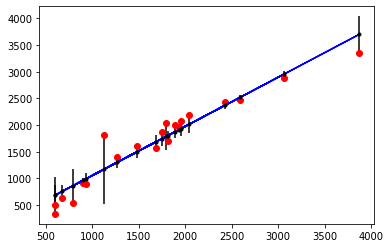

In [ ]:
x = count.counts
y = count.pred

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, y, 'ro', x, poly1d_fn(x), '-b')
plt.errorbar(x, poly1d_fn(x), yerr=poly1d_fn(x) - y, fmt='.k')
plt.show()

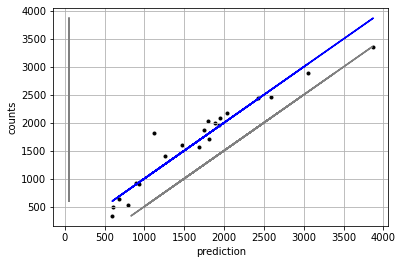

In [ ]:
plt.scatter(x,y,s=9,color='k') 
plt.plot(count['counts'],x,color='b')
plt.plot(count['upper'],y,color='grey')
plt.plot(count['lower'],x,color='grey') 
plt.ylabel('counts') 
plt.xlabel('prediction')
plt.grid()

Test

In [ ]:
df1['hour'] = df1.Time.astype(str).str[:2]
df1['hour']=df1['hour'].replace(['00','01','02','03','04','05','06','23'],'low') 
df1['hour']=df1['hour'].replace(['07','08','09','10','15','16','17','21','22'],'high')
df1['hour']=df1['hour'].replace(['11','12','13','14','18','19','20'],'medium')
df1['weekday'] =  df1.Date.astype(str).str[-2:]
df1['weekday'] = df1['weekday'].replace(['09','16','23'],'Monday')
df1['weekday'] = df1['weekday'].replace(['10','17','24'],'Tuesday')
df1['weekday'] = df1['weekday'].replace(['11','18','25'],'Wednsday')
df1['weekday'] = df1['weekday'].replace(['12','19','26'],'Thursday')
df1['weekday'] = df1['weekday'].replace(['13','20','27'],'Friday')
df1['weekday'] = df1['weekday'].replace(['14','21','28'],'Saturday')
df1['weekday'] = df1['weekday'].replace(['15','22','29'],'Sunday')
df1

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,low,Monday
1,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,low,Monday
2,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,low,Monday
3,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,low,Monday
4,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812084,-43.250550,00:00:06.312,2019-09-09,block3,low,Monday
...,...,...,...,...,...,...,...,...,...,...
625044,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811975,-43.250116,23:59:01.119,2019-09-29,block3,low,Sunday
625045,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811975,-43.250116,23:59:11.151,2019-09-29,block3,low,Sunday
625046,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811965,-43.250123,23:59:21.111,2019-09-29,block3,low,Sunday
625047,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811953,-43.250129,23:59:31.143,2019-09-29,block3,low,Sunday


In [ ]:
df1.hour.unique()

array(['low', 'high', 'medium'], dtype=object)

In [ ]:
df1.weekday.unique()

array(['Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
count1 = df1.groupby(['weekday','hour'])['MAC'].nunique()
count1 = pd.DataFrame({'counts':count1/3})
count1.reset_index(inplace=True)
count1

,weekday,hour,counts
0,Friday,high,1613.666667
1,Friday,low,529.666667
2,Friday,medium,1228.333333
3,Monday,high,2073.666667
4,Monday,low,626.000000
5,Monday,medium,1464.666667
6,Saturday,high,1011.333333
7,Saturday,low,470.666667
8,Saturday,medium,554.000000
9,Sunday,high,1889.333333


In [ ]:
pred1 = m.predict(test)

In [ ]:
count1["pred"] = pred1

In [ ]:
x1 = count1['counts']
y1 = count1['pred']

In [ ]:
count1['diff'] = count1['counts'] - count1['pred']
count1['upper'] = count1['pred']+200
count1['lower'] = 50
count1

,weekday,hour,counts,pred,diff,upper,lower
0,Friday,high,1613.666667,2463.142857,-849.476190,2663.142857,50
1,Friday,low,529.666667,921.000000,-391.333333,1121.000000,50
2,Friday,medium,1228.333333,1991.357143,-763.023810,2191.357143,50
3,Monday,high,2073.666667,1874.476190,199.190476,2074.476190,50
4,Monday,low,626.000000,332.333333,293.666667,532.333333,50
5,Monday,medium,1464.666667,1402.690476,61.976190,1602.690476,50
6,Saturday,high,1011.333333,2437.726190,-1426.392857,2637.726190,50
7,Saturday,low,470.666667,895.583333,-424.916667,1095.583333,50
8,Saturday,medium,554.000000,1965.940476,-1411.940476,2165.940476,50
9,Sunday,high,1889.333333,3355.976190,-1466.642857,3555.976190,50


In [ ]:
max(count1['diff'])

293.66666666666697

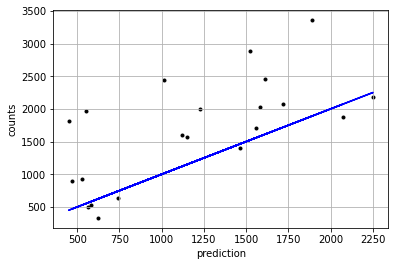

In [ ]:
plt.scatter(x1,y1,s=9,color='k') 
plt.plot(count1['counts'],x1,color='b')
#plt.plot(count1['upper'],y1,color='grey')
#plt.plot(count1['lower'],x1,color='grey') 
plt.ylabel('counts') 
plt.xlabel('prediction')
plt.grid()

In [ ]:
warning = pd.DataFrame()
for i in range(len(count1)):
  if count1['upper'][i] - count1['counts'][i] < 0:
    warning=warning.append(count1.iloc[i])
    warning['density'] = "extremely high"
  elif count1['lower'][i] - count1['counts'][i] > 0:
    warning=warning.append(count1.iloc[i])
    warning['density'] = "extremely low"
print(warning[['weekday','hour','density']]) 

  weekday hour         density
4  Monday  low  extremely high
